In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings

warnings.filterwarnings("ignore")

In [2]:
stroke=pd.read_csv(r'/content/drive/MyDrive/healthcare-dataset-stroke-data.csv',header=0)

In [3]:
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Preprocessing the data

In [4]:
stroke.drop('smoking_status',axis=1,inplace=True)

In [5]:
stroke.shape

(5110, 11)

In [6]:
stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
stroke                 0
dtype: int64

In [7]:
stroke.duplicated().sum()

0

In [8]:
stroke.value_counts().sum()

4909

In [9]:
stroke.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
stroke                 int64
dtype: object

In [10]:
bmi_mean =stroke['bmi'].mean()

In [11]:
stroke['bmi'].fillna(bmi_mean, inplace=True)

In [12]:
stroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
stroke               0
dtype: int64

here assinging all the object datatypes in a colname so the we can do label encoding to all the object datatypes columns simultaneously. so by label encoding we can convert all the object datatypes into string format,  so that we can able to analys and predict the data  

In [13]:
colname=[]
for x in stroke.columns:
  if stroke[x].dtypes=="object":
    colname.append(x)

In [14]:
colname

['gender', 'ever_married', 'work_type', 'Residence_type']

In [15]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for x in colname:
  stroke[x]=le.fit_transform(stroke[x])

Giving the x and y where x is indipendent columns and y is dependent where y is bascially a traget which we have to predict based upon the x



In [16]:
x=stroke.values[:,0:-1]
y=stroke.values[:,-1]

In [17]:
print(x.shape)
print(y.shape)

(5110, 10)
(5110,)


For scaling the data in the range of -1 to 1 with the standard scaler function

In [18]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(x)
ss=scaler.transform(x)


In [19]:
print(ss)

[[-1.29831203e+00  1.18807255e+00  1.05143428e+00 ...  9.84079744e-01
   2.70637544e+00  1.00123401e+00]
 [ 7.16371490e-01 -8.40343999e-01  7.86070073e-01 ... -1.01617781e+00
   2.12155854e+00  4.61555355e-16]
 [-2.55478192e-01  1.18807255e+00  1.62639008e+00 ... -1.01617781e+00
  -5.02830130e-03  4.68577254e-01]
 ...
 [-7.93719586e-01 -8.40343999e-01 -3.63841511e-01 ... -1.01617781e+00
  -5.11442636e-01  2.21736316e-01]
 [ 4.84965773e-02  1.18807255e+00  3.43796387e-01 ... -1.01617781e+00
   1.32825706e+00 -4.27845098e-01]
 [ 3.85694957e-01 -8.40343999e-01  3.42048064e-02 ...  9.84079744e-01
  -4.60867458e-01 -3.49895329e-01]]


spliting the x and y where the 80% of x and y for training  the data and the reamining 20% is for testing means predicting the data on the basis of x of testing data and y will be prediction

In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=10)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4088, 10)
(1022, 10)
(4088,)
(1022,)


Applying the LogisticRegression

In [21]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
y_pred=lr.predict(x_test)

0.952054794520548


In [22]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

predicting the data by using the confusion matrix and as well as accuracy score and classifiation refort for better understanding of the prediction

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[958   2]
 [ 62   0]]
0.9373776908023483
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       960
         1.0       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



So here we can observe that the accuracy is 93.37% which is a good prediction by a model so we conclude that our model is doing a great job for predciting a unknown data so while comparing the accuracy of the train data which is 95% and the test is data is giving the 93% whcih is an accurate prediction by an model

In [24]:
y_pred_prob=lr.predict_proba(x_test)
y_pred_prob

array([[0.99280517, 0.00719483],
       [0.95894738, 0.04105262],
       [0.95360129, 0.04639871],
       ...,
       [0.98927437, 0.01072563],
       [0.9760959 , 0.0239041 ],
       [0.99048018, 0.00951982]])

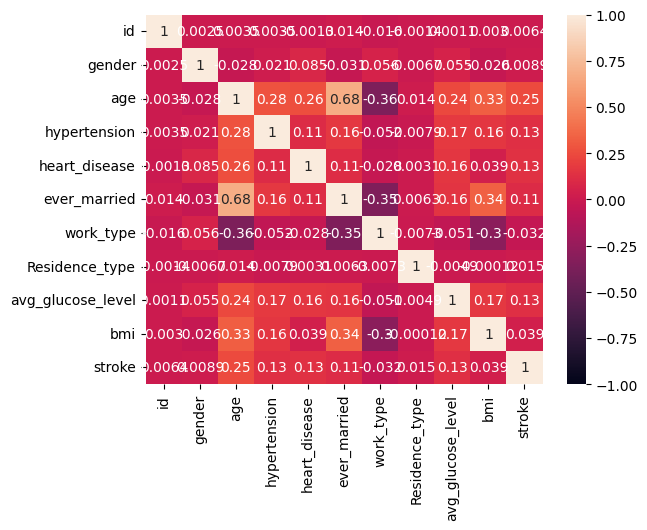

In [25]:
correlation=stroke.corr(method="pearson")
correlation

sns.heatmap(correlation,vmax=1.0,vmin=-1.0,annot=True)
plt.show()
